# Introducing Libraries: NumPy and Pandas

## Introduction

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail to plan ahead. You have found out that Austin has one of the largest no-kill animal shelters in the country, and they keep meticulous track of animals that have been taken in and released. However, it is a large file, the online visualization tools provided are terrible, the data are recorded as strings, and the file holds an overwhelming amount of information. What can we do?


#### Our goals today are to be able to: 

- Identify and import Python libraries
- Identify differences between NumPy and base Python in usage and operation
- Import/read data using Pandas
- Identify Pandas objects and manipulate Pandas objects by index and columns
- Filter data using Pandas

#### Big questions for this lesson: 

- What is a package, what do packages do, and why might we want to use them?
- When do we want to use NumPy versus Pandas?
- What are the advantages of using Pandas?

### First Things First

![excel](excelpic.jpg)

Why can't we just use Excel or Google Sheets? Let's discuss.

Some resources/food for thought:

- [Blog post 1](https://www.cbtnuggets.com/blog/certifications/microsoft/why-pandas-is-a-better-data-analysis-tool-than-excel)
- [Blog post 2](https://blog.thedataincubator.com/2017/11/excel-and-pandas/)
- [Blog post 3](https://towardsdatascience.com/intro-to-pandas-for-excel-super-users-dac1b38f12b0)
- [And reddit weighs in on this topic, too](https://www.reddit.com/r/datascience/comments/8ggvx4/why_python_over_excel/)

### Importing Python Libraries

Alright, no matter where that discussion led and even if Excel has its uses, we still aren't going to use it in this course. But, before we dive into our animal data, we need to figure out how we're going to interact with our data. 

Do you remember that, in an earlier lesson, we wrote a function to calculate the mean of an list? That was **tedious**.

Thankfully, other people have wrote and optimized functions and wrapped them into `libraries` we can then call and use in our analysis.

![numpy](https://raw.githubusercontent.com/donnemartin/data-science-ipython-notebooks/master/images/numpy.png)

[NumPy](https://www.numpy.org/) is the fundamental package for mathematic and scientific computing with Python. 

Let's use it! To import a package type `import` followed by the name of the library as shown below.

In [1]:
import numpy 

x=numpy.array([1,2,3])
print(x)

[1 2 3]


In [2]:
#most packages have a standard way to import them
import numpy as np

y=np.array([4,5,6])
print(y)

[4 5 6]


Because of numpy we can now get the **mean** and other quick math of lists and arrays.

In [3]:
example = [4,3,25,40,62,20]
print(np.mean(example))

25.666666666666668


Now let's import some other packages. We will cover in more detail some fun options for numpy later.

In [4]:
import scipy
import pandas as pd

In [8]:
# Sometimes we will want to import a specific module from a library
import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot(x,y)
# # plt.show()

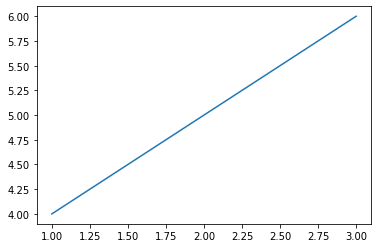

In [9]:
# OR we can also import it this way

from matplotlib import pyplot as plt 
plt.plot(x,y)

Try importing the Seaborn library as ['sns'](https://en.wikipedia.org/wiki/Sam_Seaborn), which is the convention.

In [10]:
# import Seaborn here
import seaborn as sns

What happens if we mess with naming conventions? For example, import one of our previous libraries as print.


PLEASE NOTE THAT WE WILL HAVE TO RESET THE KERNEL AFTER RUNNING THIS. Comment out your code after running it.


In [ ]:
# Don't say we didn't warn you

#import numpy as print

In [ ]:
# Did we get an error? What about when we run the following command?

print(x)

# And now we all need to restart our kernels and clear cells

#### Helpful links: library documenation

Libraries have associated documentation to explain how to use the different tools included in a library. Reading documentation is an art, something we'll practice throughout this course, so don't worry too much if it doesn't feel natural yet (but let's discuss some tricks and tips for reading documentation outside of class if this isn't something you're used to yet!).

- [NumPy](https://docs.scipy.org/doc/numpy/)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/)
- [Pandas](http://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib](https://matplotlib.org/contents.html)

### 2. NumPy versus base Python

Now that we know libraries exist, why do we want to use them? Let us examine a comparison between base Python and Numpy.

Python has lists and base python can do basic math. NumPy, however, has the helpful objects called arrays.

Numpy has a few advantages over base Python which we will look at.

In [11]:
# Here's a list in base Python
names_list=['Bob','John','Sally']

# Use numpy.array for numbers and numpy.char.array for strings
names_array=np.char.array(['Bob','John','Sally']) 

print(names_list)
print(names_array)

['Bob', 'John', 'Sally']
['Bob' 'John' 'Sally']


In [12]:
# Similarly, let's make both a list and an array of three numbers
num_list=[1, 2, 3]
num_array=np.array([1, 2, 3]) 

In [13]:
# Let's divide the array by 2
num_array/2

array([0.5, 1. , 1.5])

In [14]:
# But what if we want to divide the list by 2?
num_list/2

TypeError: unsupported operand type(s) for /: 'list' and 'int'

Numpy arrays support the \_div\_ operator while python lists do not. There are other things that make it useful to utilize numpy over base python for evaluating data.

Below, you will find a piece of code we will use to compare the speed of operations on a list and operations on an array. In this speed test, we will use the library [time](https://docs.python.org/3/library/time.html).

In [15]:
import time
import numpy as np

size_of_vec = 100000

def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1


t1 = pure_python_version()
t2 = numpy_version()
print("python: " + str(t1), "numpy: "+ str(t2))
print("Numpy is in this example " + str(t1/t2) + " times faster!")

python: 0.0246889591217041 numpy: 0.0007688999176025391
Numpy is in this example 32.10945736434108 times faster!


In pairs, run the speed test with a different number, and share your results with the class.

### 3. Importing and reading data with ACTUAL LITERAL Pandas!


![pandas-lib](https://pandas.pydata.org/_static/pandas_logo.png)

![alt text](https://cdn-images-1.medium.com/max/1600/1*oBx032ncOwLmCFX3Epo3Zg.jpeg "https://cdn-images-1.medium.com/max/1600/1*oBx032ncOwLmCFX3Epo3Zg.jpeg")

#### Let's use Pandas to read some csv files so we can interact with them.

First, let's check which directory we are in so the files we expect to see are there.

In [16]:
!pwd
!ls 

/Users/lberlin/Documents/111819/utilizing-libraries_HTX-DS-111819
README.md
example1.csv
excelpic.jpg
intro_to_libraries_numpy_and_pandas.ipynb
lesson_plan.md
made_up_jobs.csv


Remember? It is possible to run terminal commands from jupyter notebook by using `!`

Now, a csv file is one in which the data is separated by commas. Feel free to try to open this with a text editor, like TextEdit for Macs, to see what this looks like. 

In [17]:
import pandas as pd

# In order to read a csv file, we use pandas' read_csv function to read in the
# csv as a pandas dataframe
example_csv = pd.read_csv('example1.csv')

There are also `read_excel` and many other pandas `read` functions. Ever have a tsv (file with tab separated values)? You can still use `read_csv` - check out [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for more details (yes those are a lot of arguments you can pass into that function).

In [21]:
# Use the head function to show the first 5 rows of a dataframe
# This csv only has 2 rows, though
example_csv.tail()

,Title1,Title2,Title3
0,one,two,three
1,example1,example2,example3


Try loading in the example file in the directory called 'made_up_jobs.csv' using pandas.

In [22]:
!ls

README.md
example1.csv
excelpic.jpg
intro_to_libraries_numpy_and_pandas.ipynb
lesson_plan.md
made_up_jobs.csv


In [30]:
# Read in your csv here!
jobs_df = pd.read_csv("made_up_jobs.csv", index_col=0)
# What do the first five rows look like?
jobs_df.head()

,Name,Job,Years Employed
ID,,,
0,Bob Bobberty,Underwater Basket Weaver,13
1,Susan Smells,Salad Spinner,5
2,Alex Lastname,Productivity Manager,2
3,Rudy P.,Being cool,55
4,Rudy G.,Being compared to Rudy P,50


In [29]:
jobs_df.shape

(6, 3)

You can also load in data by using the url of an associated dataset.

In [36]:
shelter_data = pd.read_csv(
    'https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')
# this link is copied directly from the download option for CSV

In [38]:
shelter_data.shape

(111525, 12)

Now that we can read in data, let's get more comfortable with our Pandas data structures.

In [32]:
type(shelter_data)

pandas.core.frame.DataFrame

In [41]:
shelter_data.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
1,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
2,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
3,A680969,*Zeus,08/05/2014 04:59:00 PM,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
4,A684617,NaN,07/27/2014 09:00:00 AM,07/27/2014 09:00:00 AM,07/26/2012,Transfer,SCRP,Cat,Intact Female,2 years,Domestic Shorthair Mix,Black


In [42]:
# Check out details about a specific column using brackets around the col name
ID_series = shelter_data["Animal ID"]

type(ID_series)

pandas.core.series.Series

In [45]:
ID_series[0]

'A720371'

### 4. Utilizing and identifying Pandas objects

- What is a DataFrame object and what is a Series object? 
- How are they different from Python lists and dictionary objects?

These are questions we will cover in this section. To start, let's start with this list of fruits.

In [46]:
fruits = ['Apple','Orange','Watermelon','Lemon','Mango']

print(fruits)

['Apple', 'Orange', 'Watermelon', 'Lemon', 'Mango']


Using our list of fruits, we can create a pandas object called a 'series' which is much like an array or a vector.

In [47]:
fruits_series = pd.Series(fruits)

print(fruits_series)

0         Apple
1        Orange
2    Watermelon
3         Lemon
4         Mango
dtype: object


One difference between python **list objects** and pandas **series objects** is the fact that you can define the index _manually._

In [48]:
# Defining our index
ind = ['a','a','c','d','e']

# Now let's turn that into the index for that series
fruits_series = pd.Series(fruits,index=ind)

print(fruits_series)

a         Apple
a        Orange
c    Watermelon
d         Lemon
e         Mango
dtype: object


In [55]:
# Use .loc on a series to locate where the index matches what you pass in
fruits_series.loc["a"]

a     Apple
a    Orange
dtype: object

In [56]:
fruits_series.reset_index()

,index,0
0,a,Apple
1,a,Orange
2,c,Watermelon
3,d,Lemon
4,e,Mango


We can do a simliar thing with Python dictionaries. This time, however, we will create a DataFrame object from a Python dictionary.

In [69]:
# Dictionary with list object in values
student_dict = {
    'name' : ['Samantha', 'Alex', 'Dante'],
    'age' : ['35','17','26'],
    'city' : ['Houston', 'Seattle', 'New York']
}

students_df = pd.DataFrame(student_dict)

students_df.head()

,name,age,city
0,Samantha,35,Houston
1,Alex,17,Seattle
2,Dante,26,New York


In [70]:
# Find data types of values in columns
# Note the lack of () - this is an attribute, not a method/function
students_df.dtypes

name    object
age     object
city    object
dtype: object

Let's change the data type of ages to int.

In [71]:
# Note! df.colname is the same as df['colname']
students_df.age = students_df['age'].astype(int)

students_df.dtypes

name    object
age      int64
city    object
dtype: object

We can also use a custom index for these items. For example, we might want them to be the individual student ID numbers.

In [72]:
school_ids = ['1111','1145','0096']

students_df = pd.DataFrame(student_dict,index=school_ids)

students_df.head()

,name,age,city
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New York


Using Pandas, we can also rename column names.

In [73]:
students_df.columns = ['NAME', 'AGE','HOME']
students_df.head()

,NAME,AGE,HOME
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New York


Or, we can also change the column names using the rename function.

In [74]:
new_df = students_df.rename(columns={'AGE': 'YEARS'})
new_df

,NAME,YEARS,HOME
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New York


In [75]:
new_df.head()

,NAME,YEARS,HOME
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New York


Similarly, there is a tool to remove rows and columns from your DataFrame

In [76]:
students_df.drop(columns=['AGE', 'HOME'])

,NAME
1111,Samantha
1145,Alex
0096,Dante


In [77]:
# Did that actually drop those columns? Let's do a sanity check
students_df.head()

,NAME,AGE,HOME
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New York


Weird, those columns are still there! If you want the file to save over itself, use the option `inplace = True`.

Every function has options. Let's read more about `drop` [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [78]:
students_df.drop(index=['1111']) #unintuitively, this is a string!

,NAME,AGE,HOME
1145,Alex,17,Seattle
0096,Dante,26,New York


Adding columns can be a bit trickier, however.

#### Getting Started

Let's define a function that returns a dataframe for us to work with. Note that this dataframe is created from a `list` of dictionaries, and each `dict` has identical _keys_ representing field names. The _values_ are the data to be stored in each field.

This list-of-dictionaries format is a common way to represent _rows of data_ in Python.

Pandas is not the only tool that supports it natively: **MongoDB** also represents each row of a dataset as a dictionary. This format is also useful when working with big data in Spark.

In [81]:
customers = [
        {'name': 'Harmony', 'state': 'OR'},
        {'name': 'Sarah', 'state': 'CA'},
        {'name': 'Sharad', 'state': 'WA'},
        {'name': 'CJ', 'state': 'NY'},
        {'name': 'Jerry', 'state': 'OR'},
        {'name': 'David', 'state': 'CA'}
    ]

def get_customer_data(data):
    """Return a Pandas DataFrame containing imaginary customer data."""
    
    return pd.DataFrame(data)

In [82]:
get_customer_data(customers)

,name,state
0,Harmony,OR
1,Sarah,CA
2,Sharad,WA
3,CJ,NY
4,Jerry,OR
5,David,CA


#### Get the customer data

In [99]:
customer_df = get_customer_data(customers)

In [100]:
customer_df.head(6)

,name,state
0,Harmony,OR
1,Sarah,CA
2,Sharad,WA
3,CJ,NY
4,Jerry,OR
5,David,CA


#### Try to identify all Oregonian customers as hippies:


In [89]:
oregon_customer_df = customer_df.loc[customer_df['state'] == 'OR']
oregon_customer_df['is_hippy'] = 1

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
oregon_customer_df

,name,state,is_hippy
0,Harmony,OR,1
4,Jerry,OR,1


#### Try to identify all non-Oregonian customers as non-hippies:


In [91]:
non_oregon_customer_df = customer_df[customer_df['state'] != 'OR']
non_oregon_customer_df['is_hippy'] = 0

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
non_oregon_customer_df

,name,state,is_hippy
1,Sarah,CA,0
2,Sharad,WA,0
3,CJ,NY,0
5,David,CA,0


#### We can do the same thing on a single line (and get the same warning):

In [93]:
customer_df[customer_df['state'] == 'OR']['is_hippy'] = 1

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### See the results! (What's wrong?)

In [95]:
customer_df

,name,state
0,Harmony,OR
1,Sarah,CA
2,Sharad,WA
3,CJ,NY
4,Jerry,OR
5,David,CA


#### What went wrong?

1. First, we _sliced_ the original dataframe to include just Oregon customers.
2. The _slice_ `oregon_customer_df` could be interpreted as a _new dataframe_ containing the selected rows in the original `customer_df`, or as a _pointer to_ the rows in the original dataframe. Pandas doesn't know which one we want.
3. When we try to _modify_ or _set_ values in the slice, Pandas doesn't know what to do.

#### One way to avoid the error is to explicitly make a copy of the slice with `df.copy()`:

In [96]:
oregon_customer_df = customer_df[customer_df['state'] == 'OR'].copy()
oregon_customer_df['is_hippy'] = 1
oregon_customer_df

,name,state,is_hippy
0,Harmony,OR,1
4,Jerry,OR,1


#### What if we really want to modify the original dataframe?
#### We can use `df.loc[columns, rows]` to explicity modify the original dataframe.

In [105]:
customer_df.loc[customer_df['state'] == 'OR', 'is_hippy'] = True
customer_df.loc[customer_df['state'] != 'OR', 'is_hippy'] = False

In [106]:
customer_df

,name,state,is_hippy
0,Harmony,OR,True
1,Sarah,CA,False
2,Sharad,WA,False
3,CJ,NY,False
4,Jerry,OR,True
5,David,CA,False


#### See the awesome results!


In [107]:
customer_df

,name,state,is_hippy
0,Harmony,OR,True
1,Sarah,CA,False
2,Sharad,WA,False
3,CJ,NY,False
4,Jerry,OR,True
5,David,CA,False


In [109]:
customer_df.dtypes


customer_df['is_hippy'].astype(bool)

0     True
1    False
2    False
3    False
4     True
5    False
Name: is_hippy, dtype: bool

### 5. Filtering data using Pandas

There are several ways to grab particular data from a DataFrame.

We saw the use of loc in the previous example. iloc and loc can be used in a few different ways to access data from a DataFrame. 

In [110]:
customer_df.iloc[0] #returns the first row

name        Harmony
state            OR
is_hippy       True
Name: 0, dtype: object

In [111]:
customer_df.iloc[:,0] #returns the first column

0    Harmony
1      Sarah
2     Sharad
3         CJ
4      Jerry
5      David
Name: name, dtype: object

In [112]:
customer_df.iloc[0:2] #returns first two rows

,name,state,is_hippy
0,Harmony,OR,True
1,Sarah,CA,False


In [114]:
customer_df.iloc[:,0:3] #returns the first two columns

,name,state,is_hippy
0,Harmony,OR,True
1,Sarah,CA,False
2,Sharad,WA,False
3,CJ,NY,False
4,Jerry,OR,True
5,David,CA,False


How would we use indexing to return the last item in the last row?

In [115]:
#return the last item in the last row using indexing

customer_df.iloc[-1][-1]

False

Use loc to return rows and columns based on labels. Let's look at the students_df DataFrame again.

In [116]:
students_df.head()

,NAME,AGE,HOME
1111,Samantha,35,Houston
1145,Alex,17,Seattle
0096,Dante,26,New York


In [117]:
students_df.loc['1111'] #returns the row associated with index 1111

NAME    Samantha
AGE           35
HOME     Houston
Name: 1111, dtype: object

In [119]:
students_df.loc[:,'AGE'] #returns the column labeled 'YEARS'

1111    35
1145    17
0096    26
Name: AGE, dtype: object

In [120]:
#returns the row labeled '1111' for columns from 'NAME' to 'AGE'
students_df.loc['1111','NAME':'AGE'] 

NAME    Samantha
AGE           35
Name: 1111, dtype: object

How could we return the first and last rows if `loc` accepts a list of labels?

In [ ]:
#return the first and last rows using one loc command
students_df.iloc[[0,-1]]


We can use loc to complete more complicated filtering of our data using boolean indexing.

In [121]:
#returns only rows where the name of the student is Samantha
students_df.loc[students_df['NAME']=='Samantha'] 

,NAME,AGE,HOME
1111,Samantha,35,Houston


We can also find out which customers in the customer_df DataFrame are not from Oregon. However, I only want to know their names. How would I return this?

In [122]:
customer_df.head()

,name,state,is_hippy
0,Harmony,OR,True
1,Sarah,CA,False
2,Sharad,WA,False
3,CJ,NY,False
4,Jerry,OR,True


In [123]:
#return the names of customers who are not from Oregon
customer_df.loc[customer_df['state']!='OR']


,name,state,is_hippy
1,Sarah,CA,False
2,Sharad,WA,False
3,CJ,NY,False
5,David,CA,False


Let's select only a single column from a DataFrame. This will create a series, which allows for straightforwards, simple selection of the data it holds. 

In [124]:
states=customer_df.loc[:,'state'] #returns a series!!
type(states)

pandas.core.series.Series

In [125]:
states[0:3] #returns the first 3 items

0    OR
1    CA
2    WA
Name: state, dtype: object

In [ ]:
states[states=='OR'] #returns 'OR' data and index

Now that we know how to select specific data, we can manipulate those cells. For example, we need to update our customer data because all of our customers in Oregon have moved to New Jersey.

In [ ]:
customer_df.loc[customer_df["state"]=='WA'] = 'NJ'

customer_df
# Is this what we want it to do? How should we change this"?

Or maybe we got a customer's name wrong and need to change that. Perhaps CJ is actually named TJ. How would we do that?

In [ ]:
#return a the customer_df with the fixed name

customer_df.loc[customer_df["name"]=='CJ'] = 'TJ'

customer_df

## Lesson Recap/Further Practice

Now that we have all of these new tools in our tool belt, let's dive into our animal shelter data! 

- Use `shelter_data.columns` to get the list of column names
- Drop columns from the animal shelter data until you have only 5 columns remaining
- Rename those columns
- Get the `unique()` values in outcomes 
- select rows of animals based on an application of boolean indexing

For extra credit: add in your own new column on information to this DataFrame.